In [63]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [64]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [65]:
df = pd.read_csv(path, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [66]:
headers = ['Age', 'Gender', 'Body Mass Index', 'No. of Children', 'Smoker', 'Region', 'Charge']
df.columns = headers
df.head()

,Age,Gender,Body Mass Index,No. of Children,Smoker,Region,Charge
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [67]:
df.replace('?', np.nan, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2768 non-null   object 
 1   Gender           2772 non-null   int64  
 2   Body Mass Index  2772 non-null   float64
 3   No. of Children  2772 non-null   int64  
 4   Smoker           2765 non-null   object 
 5   Region           2772 non-null   int64  
 6   Charge           2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [69]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['Age'].astype('float').mean(axis=0)
df["Age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2772 non-null   int32  
 1   Gender           2772 non-null   int64  
 2   Body Mass Index  2772 non-null   float64
 3   No. of Children  2772 non-null   int64  
 4   Smoker           2772 non-null   int32  
 5   Region           2772 non-null   int64  
 6   Charge           2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


C:\Users\Abdulrhman Alsir\AppData\Local\Temp\ipykernel_12160\4109799451.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Smoker"].replace(np.nan, is_smoker, inplace=True)
C:\Users\Abdulrhman Alsir\AppData\Local\Temp\ipykernel_12160\4109799451.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [71]:
df['Charge'].round(2)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
2767     8569.86
2768     2020.18
2769    16450.89
2770    21595.38
2771     9850.43
Name: Charge, Length: 2772, dtype: float64

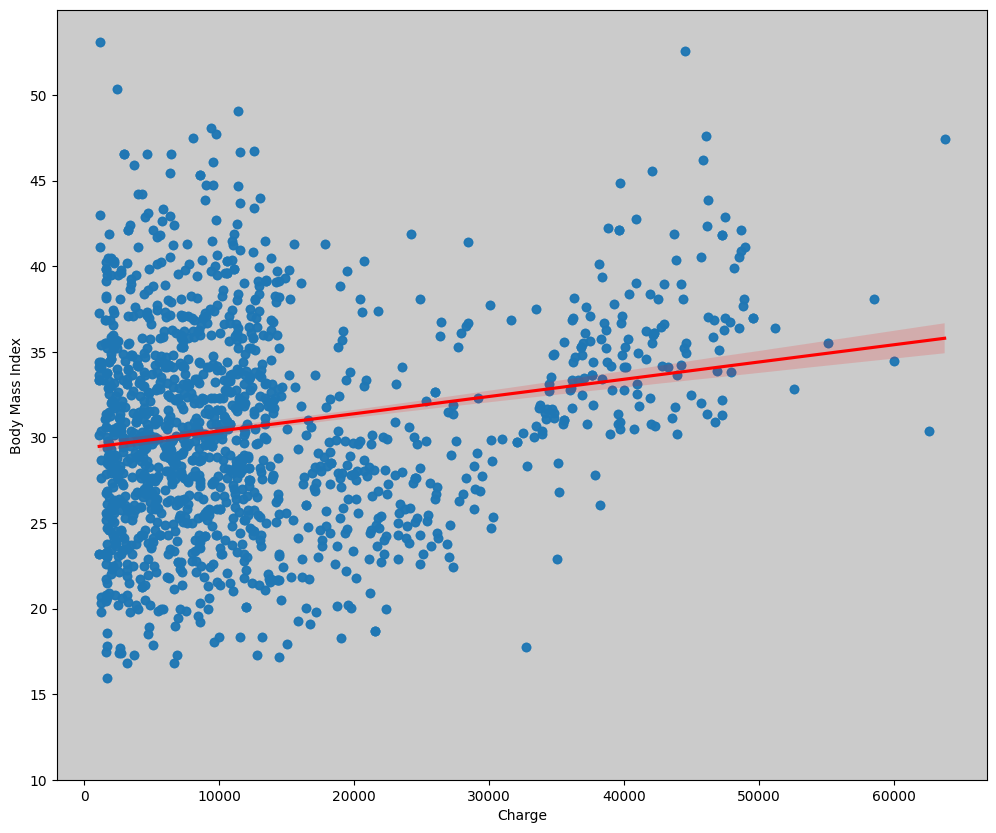

In [76]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x= 'Charge', y='Body Mass Index', data=df, line_kws={'color': 'red'})
plt.ylim(10,)
ax = plt.gca()
ax.set_facecolor((0.797, 0.797, 0.797))
plt.show()
plt.close()


(0.0, 66902.8557155)

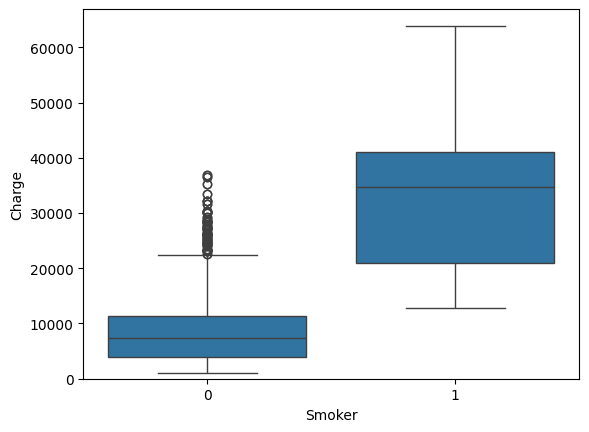

In [78]:
sns.boxplot(x= 'Smoker', y='Charge', data=df)
plt.ylim(0, )

In [79]:
df.corr()

,Age,Gender,Body Mass Index,No. of Children,Smoker,Region,Charge
Age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
Body Mass Index,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No. of Children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charge,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [83]:
lr = LinearRegression()
X = df[['Smoker']]
Y = df['Charge']
lr.fit(X, Y)
lr.predict(X)
lr.score(X, Y)

0.6221791718835359

In [85]:
Z = df[['Age', 'Body Mass Index', 'No. of Children', 'Smoker', 'Region']]
lr1 = LinearRegression()
lr1.fit(Z, Y)
lr1.score(Z, Y)

0.7504038028664064

In [87]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('linear', LinearRegression())]
pipe = Pipeline(input)
Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
r2_score(Y, ypipe)

0.8446268860734459

In [90]:
y_data = df['Charge']
x_data = df.drop('Charge', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [93]:
RM = Ridge(alpha=0.1)
RM.fit(x_train, y_train)
yhat = RM.predict(x_test)
r2_score(y_test, yhat)


0.6760807753399252

In [95]:
poly = PolynomialFeatures(degree=2)
x_train_pr = poly.fit_transform(x_train)
x_test_pr = poly.fit_transform(x_test)
RM.fit(x_train_pr, y_train)
ypoly = RM.predict(x_test_pr)
r2_score(y_test, ypoly)

0.7835631069813811